## **PFA - algorithmes génétiques - tsp**


---





# La préparation de données

In [ ]:
#intialisation des donnees

# les villes à visiter (en ne peux pas passer 50 pour utiliser l api gratuitement )
#countries3 = ["Casablanca","Beni-Mellal","Meknes","Marrakesh",
#                "Larache","Fes","Mohammedia","Midelt","El Hoceima",
#               "Tangier","Rabat","Agadir","Essaouira","Tetouan","Sidi Slimane","Chefchaouen","Kenitra","Ifran","Nador","Taroudant","Settat","Guelmim","Khouribga"]
# villes = ["Casablanca","Beni-Mellal","Meknes","Marrakesh","Larache","Fes","Mohammedia","Midelt","El Hoceima","Tangier","Rabat","Agadir","Essaouira","Tetouan","Sidi Slimane","Chefchaouen","Kenitra","Ifran","Nador","Taroudant","Settat","Guelmim","Khouribga",
#           "Dakhla","Laayoune","Al Mahbes","Saidia","Zagora","Merzouga","Ouarzazate","Awsard","Moulay Idriss Zerhoun","Tarfaya","Lagouira","Oujda"]
#countries2 = ["Casablanca","Beni-Mellal","Meknes","Marrakesh",
 #               "Larache","Fes","Mohammedia","Midelt","El Hoceima",
  #             "Tangier","Rabat","Agadir","Essaouira","Tetouan","Sidi Slimane","Chefchaouen","Kenitra","Ifran","Nador","Taroudant","Settat","Guelmim","Khouribga","Saidia","Zagora","Merzouga","Ouarzazate","Oujda","Moulay Idriss Zerhoun"]
#len(villes)

In [ ]:
villes = ["Casablanca","Beni-Mellal","Meknes","Marrakesh","Larache","Fes","Mohammedia","Midelt","El Hoceima","Tangier","Rabat","Agadir","Essaouira","Tetouan","Sidi Slimane","Chefchaouen","Kenitra","Ifran","Nador","Taroudant","Settat","Guelmim","Khouribga",
          "Dakhla","Laayoune","Al Mahbes","Saidia","Zagora","Merzouga","Ouarzazate","Awsard","Moulay Idriss Zerhoun","Tarfaya","Lagouira","Oujda"]

In [ ]:
print(f"nombre de villes : {len(villes)}")

nombre de villes : 35


installation de la bebliotheque google maps

In [ ]:
pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.4.1-cp36-none-any.whl size=37819 sha256=1b44a0222326d17e4ec02b47462d6cc7bd94fb9eac8261f9765ac65d0bb93b36
  Stored in directory: /root/.cache/pip/wheels/5c/ec/b9/9d0c26b80d7dcf16496c82e8108c93186c6d4df097a41bba4f
Successfully built googlemaps


In [ ]:
#import 
import googlemaps
#utilisation de l API "Distance Matrix" qui vas nous aider a calculer les distances entre les villes
gm_api = googlemaps.Client(key="")

In [ ]:
from itertools import combinations

In [ ]:
distance_villes = {}
duree_villes ={}
# calculer la distance et la duree entre chaque villes en mode "driving" avec le service distance_matrix de google maps
for (ville1, ville2) in combinations(villes, 2):
  route = gm_api.distance_matrix(origins=[ville1],
                                 destinations=[ville2],
                                 mode="driving",
                                 language="English",
                                 units="metric")
  #retourn une valeur (distance entre 2 villes) en metres
  distance = route['rows'][0]['elements'][0]['distance']['value']
  #retourn une valeur (duree entre 2 villes) en seconds
  duree = route['rows'][0]['elements'][0]['duration']['value']

  #stocker ses valeur dans un set
  distance_villes[frozenset([ville1,ville2])] = distance
  duree_villes[frozenset([ville1,ville2])] = duree


output route: c'est un dictionaire
{'destination_addresses': ['Khouribga, Morocco'],
 'origin_addresses': ['Guelmim 81000, Morocco'],
 'rows': [{'elements': [{'distance': {'text': '690 km', 'value': 690142},
     'duration': {'text': '7 hours 48 mins', 'value': 28101},
     'status': 'OK'}]}],
 'status': 'OK'}

In [ ]:
# stocker notre sets dans un seul fichier tsv
with open("mes_villes_dist_dur2.tsv", "w") as mes_villes:
  mes_villes.write("\t".join(["ville1","ville2","distance_m","duree_s"]))
  for (ville1, ville2) in distance_villes.keys():
    #stockage sou forme ville1\ville2\dist_m\dur_s
    #transformer la distance et la duree a une chaine de character
    mes_villes.write("\n" +
                       "\t".join([ville1,
                                  ville2,
                                  str(distance_villes[frozenset([ville1, ville2])]),
                                  str(duree_villes[frozenset([ville1, ville2])])]))

# lire les données

In [ ]:
import pandas as pd
import numpy as np

distance_villes = {}
duree_villes ={}
#list ==> set 
villes = set()
#tsv file ==> dataframe avec pandas
villes_data = pd.read_csv("mes_villes_dist_dur2.tsv", sep="\t")

for i, row in villes_data.iterrows():
  distance_villes[frozenset([row.ville1, row.ville2])] = row.distance_m
  duree_villes[frozenset([row.ville1, row.ville2])] = row.duree_s
  villes.update([row.ville1, row.ville2])

In [ ]:
villes_data

,ville1,ville2,distance_m,duree_s
0,Beni-Mellal,Casablanca,222593,8836
1,Meknes,Casablanca,238107,9349
2,Marrakesh,Casablanca,241636,9441
3,Casablanca,Larache,258596,9469
4,Fes,Casablanca,293990,10972
...,...,...,...,...
590,Moulay Idriss Zerhoun,Lagouira,2239983,95317
591,Moulay Idriss Zerhoun,Oujda,412972,15890
592,Lagouira,Tarfaya,989021,42449
593,Oujda,Tarfaya,1596257,63756


# algorithmes génétiques

## **`algorithmes génétiques`** 
Il y a trois opérateurs d'évolution dans les algorithmes génétiques :

* La sélection : Choix des individus les mieux adaptés.
* Le croisement : Mélange par la reproduction des particularités des individus choisis.
* La mutation : Altération aléatoire des particularités d'un individu.

In [ ]:
import random

## 
def compute_fitness(solution):
  """ cette function return la distance totale du chemin courant entre les villes"""
  solution_fitness = 0.0
  for i in range(len(solution)):
    ville1 = solution[i - 1]
    ville2 = solution[i]
    solution_fitness += distance_villes[frozenset([ville1, ville2])]
  return solution_fitness

#### choix aleatoire
def chemin_aleatoire():
  """ creer un chemin aleatoire par l'ensembles des villes donnees """
  new_chemin = list(villes)
  # melanger notre list
  random.shuffle(new_chemin)
  return tuple(new_chemin)
#### mutation 1 : echange
def mutation_agent(agent_genome, max_mutaions=3):
  """ faire l echange au max de 3 villes dans notre set """
  agent_genome = list(agent_genome)
  num_mutation = random.randint(1,max_mutaions)
  for mut in range(num_mutation):
    index_echange1 = random.randint(0,len(agent_genome)-1)

    index_echange2 = index_echange1
    # pour eviter de choisir le meme index
    while index_echange1 == index_echange2:
      index_echange2 = random.randint(0,len(agent_genome)-1)
    # faire l'echange
    agent_genome[index_echange1], agent_genome[index_echange2] = agent_genome[index_echange2], agent_genome[index_echange1]
  
  return tuple(agent_genome)

#### mutation 2 : melange 
def melange_mutation(agent_genome):
  """
   couper une sous list de taille aléatoire et la déplacer à un autre index aléatoire
  """
  agent_genome = list(agent_genome)

  debut = random.randint(0, len(agent_genome)-1)
  fin = debut + random.randint(2,10)

  sous_genome = agent_genome[debut:fin]
  agent_genome = agent_genome[:debut] + agent_genome[fin:]

  index_insertion = random.randint(0, len(agent_genome)-1)
  #index_insertion = random.randint(0,len(agent_genome)-1)
  agent_genome = agent_genome[:index_insertion] + sous_genome + agent_genome[index_insertion:]
  return tuple(agent_genome)

##### generer une population de differents chemin

def generate_random_population(population_size):
  random_population = []
  for agent in range(population_size):
    random_population.append(chemin_aleatoire())
  return random_population

##### pour visualiser les resultats

progress_visualisation_y = []
progress_visualisation_x = []

#####

def genetique_algo(generations = 5000, population_size= 100):
  """ fonction main de l algorithme genetique """
  population_subset_size = int(population_size/10)
  generation_sub = int(generations/10)
  # creer une population
  population = generate_random_population(population_size)

  

  for generation in range(generations):
    # calculer la distance entre les villes de tout la population
    population_fitness = {}

    for agent_genome in population:
      if agent_genome in population_fitness:
        continue
      population_fitness[agent_genome] = compute_fitness(agent_genome)
    
    # prendre 10% de la population qui a le chemin le optimale et produire une offspring chacun d'eux
    new_population = []
    for rank, agent_genome in enumerate(sorted(population_fitness, key=population_fitness.get)[:population_subset_size]):
      if (generation % generation_sub == 0 or generation == generations -1 ) and rank == 0:
        print(f"Generation: {generation}, optimal chemin: {population_fitness[agent_genome]} m | unique genomes: {len(population_fitness)}")

        progress_visualisation_y.append(population_fitness[agent_genome])
        progress_visualisation_x.append(generation)

        print(agent_genome)
        print("--------------------------------------------------")
      #### faire les mutation pour la 10% de la population
      # creer une copie pour chaque chemin selectee
      new_population.append(agent_genome)
      # mutation 1 : creer 2 offspring par la mutation d'echange
      for i in range(2):
        new_population.append(mutation_agent(agent_genome, 3))
      
      # mutation 2 : creer 7 offspring par la mutaion de melange
      for i in range(7):
        new_population.append(melange_mutation(agent_genome))
      
      # remplacer population ==> new population de offspring
    for i in range(len(population))[::-1]:
      del population[i]
    population = new_population
  print("================ the optimal road ================")
  print(agent_genome)
  print("==================================================")
  return list(agent_genome)

en change le nombre de **generations** et **la taille de population** pour avoir des resultat plus optimiser 

In [ ]:
progress_visualisation_y = []
progress_visualisation_x = []
genetique_algo(generations=1000, population_size=100)

Generation: 0, optimal chemin: 21946985.0 m | unique genomes: 100
('Ifran', 'Beni-Mellal', 'Mohammedia', 'Marrakesh', 'Tetouan', 'Settat', 'Lagouira', 'Dakhla', 'Guelmim', 'Essaouira', 'Ouarzazate', 'Zagora', 'El Hoceima', 'Larache', 'Fes', 'Chefchaouen', 'Khouribga', 'Taroudant', 'Laayoune', 'Moulay Idriss Zerhoun', 'Midelt', 'Rabat', 'Awsard', 'Al Mahbes', 'Agadir', 'Kenitra', 'Saidia', 'Casablanca', 'Oujda', 'Merzouga', 'Nador', 'Sidi Slimane', 'Tarfaya', 'Tangier', 'Meknes')
--------------------------------------------------
Generation: 100, optimal chemin: 8310481.0 m | unique genomes: 95
('Zagora', 'Ouarzazate', 'Marrakesh', 'Taroudant', 'Guelmim', 'Tarfaya', 'Laayoune', 'Awsard', 'Lagouira', 'Dakhla', 'Al Mahbes', 'Agadir', 'Essaouira', 'Mohammedia', 'Casablanca', 'Settat', 'Beni-Mellal', 'Khouribga', 'Rabat', 'Kenitra', 'Tangier', 'Larache', 'Sidi Slimane', 'Chefchaouen', 'Tetouan', 'El Hoceima', 'Saidia', 'Oujda', 'Nador', 'Fes', 'Moulay Idriss Zerhoun', 'Meknes', 'Ifran', 'Mi

['El Hoceima',
 'Nador',
 'Saidia',
 'Oujda',
 'Fes',
 'Moulay Idriss Zerhoun',
 'Meknes',
 'Ifran',
 'Midelt',
 'Merzouga',
 'Zagora',
 'Ouarzazate',
 'Taroudant',
 'Guelmim',
 'Tarfaya',
 'Lagouira',
 'Awsard',
 'Dakhla',
 'Laayoune',
 'Al Mahbes',
 'Agadir',
 'Essaouira',
 'Marrakesh',
 'Beni-Mellal',
 'Khouribga',
 'Settat',
 'Casablanca',
 'Mohammedia',
 'Rabat',
 'Kenitra',
 'Sidi Slimane',
 'Larache',
 'Tangier',
 'Tetouan',
 'Chefchaouen']

# Visualisation du progree de l'algorithme génétique

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# m ==> km
progress_visualisation_y = [i / 1000  for i in progress_visualisation_y]

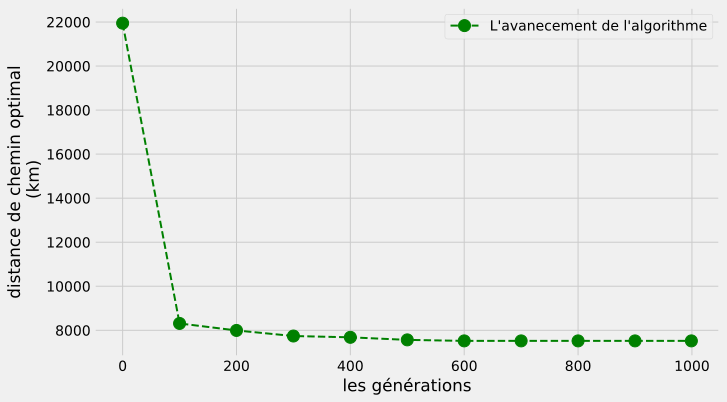

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,6)
%config InlineBackend.figure_formats = ['svg']
plt.plot(progress_visualisation_x,progress_visualisation_y,'go--', linewidth=2, markersize=12, label="L'avanecement de l'algorithme")
plt.xlabel("les générations")
plt.ylabel("distance de chemin optimal\n (km)")
_ = plt.legend(loc='best')

# help

In [ ]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [ ]:
help(sorted)


Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [ ]:
help(enumerate)

Help on class enumerate in module builtins:

class enumerate(object)
 |  enumerate(iterable[, start]) -> iterator for index, value of iterable
 |  
 |  Return an enumerate object.  iterable must be another object that supports
 |  iteration.  The enumerate object yields pairs containing a count (from
 |  start, which defaults to zero) and a value yielded by the iterable argument.
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.

